### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [96]:
import seaborn as sns

In [65]:
from matplotlib.colors import LinearSegmentedColormap

### Read File

In [3]:
water=pd.read_csv('Watera.csv')

### Exploratory Data Analysis

##### 1. Understanding the dataset

In [4]:
water.head()

,ph,hardness,tds,chlorine,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
0,7.14,440.98,614.26,2.12,208.39,350.92,7.22,17.32,2.23,0
1,6.41,242.82,387.89,3.93,313.10,153.36,9.92,20.69,2.07,0
2,6.29,133.09,225.55,1.46,332.04,1420.43,8.76,32.87,5.05,0
3,7.39,71.89,459.23,0.56,609.63,24142.89,9.62,42.80,2.26,0
4,6.31,273.01,308.99,0.64,52.59,196.85,1.05,133.38,5.30,0


In [5]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ph               96879 non-null   float64
 1   hardness         100000 non-null  float64
 2   tds              97616 non-null   float64
 3   chlorine         100000 non-null  float64
 4   sulfate          99187 non-null   float64
 5   conductivity     98402 non-null   float64
 6   organic_carbon   100000 non-null  float64
 7   trihalomethanes  100000 non-null  float64
 8   turbidity        100000 non-null  float64
 9   potability       100000 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 7.6 MB


##### 2. Checking for missing data

In [6]:
water.isna().sum()

ph                 3121
hardness              0
tds                2384
chlorine              0
sulfate             813
conductivity       1598
organic_carbon        0
trihalomethanes       0
turbidity             0
potability            0
dtype: int64

In [24]:
# Checking % missing data

print("Null values in ph = {}%".format(((water['ph'].isna().sum())/(water.shape[0]))*100))
print("Null values in hardness = {}%".format(((water['hardness'].isna().sum())/(water.shape[0]))*100))
print("Null values in tds = {}%".format(((water['tds'].isna().sum())/(water.shape[0]))*100))
print("Null values in chlorine = {}%".format(((water['chlorine'].isna().sum())/(water.shape[0]))*100))
print("Null values in sulfate = {}%".format(((water['sulfate'].isna().sum())/(water.shape[0]))*100))
print("Null values in conductivity = {}%".format(((water['conductivity'].isna().sum())/(water.shape[0]))*100))
print("Null values in organic_carbon = {}%".format(((water['organic_carbon'].isna().sum())/(water.shape[0]))*100))
print("Null values in trihalomethanes = {}%".format(((water['trihalomethanes'].isna().sum())/(water.shape[0]))*100))
print("Null values in turbidity = {}%".format(((water['turbidity'].isna().sum())/(water.shape[0]))*100))


Null values in ph = 3.121%
Null values in hardness = 0.0%
Null values in tds = 2.384%
Null values in chlorine = 0.0%
Null values in sulfate = 0.8130000000000001%
Null values in conductivity = 1.598%
Null values in organic_carbon = 0.0%
Null values in trihalomethanes = 0.0%
Null values in turbidity = 0.0%


In [32]:
## Imputing null values with median

water['ph']=water['ph'].fillna(water['ph'].median())
water['tds']=water['tds'].fillna(water['tds'].median())
water['sulfate']=water.sulfate.fillna(water['sulfate'].median())
water.conductivity=water.conductivity.fillna(water['conductivity'].median())

##### 3. Summary Statistics

In [35]:
water.describe()

,ph,hardness,tds,chlorine,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,7.249216,309.214750,328.788350,2.500058,252.830514,1999.029623,7.198689,72.739010,3.139499,0.076160
std,0.979959,222.321384,243.258211,1.616047,152.339570,3996.970819,3.507656,50.389586,2.417457,0.265255
min,5.000000,0.000000,0.030000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000
25%,6.520000,151.540000,163.197500,1.230000,138.730000,726.235000,4.710000,29.997500,1.450000,0.000000
50%,7.240000,271.080000,270.155000,2.410000,237.050000,1438.565000,7.300000,68.010000,2.660000,0.000000
75%,7.950000,391.580000,375.820000,3.570000,335.712500,2151.095000,9.840000,105.700000,4.300000,0.000000
max,9.990000,1099.990000,1099.990000,8.990000,799.970000,39961.990000,17.990000,229.960000,13.990000,1.000000


##### 4. Distribution Analysis

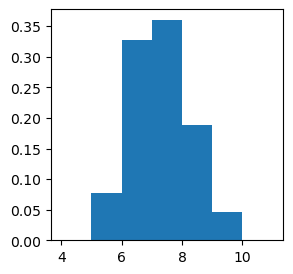

In [56]:
# pH distribution
# The ph distribution ranges from 0-14. In this dataset it is between 5 and 10
plt.figure(figsize=(3,3))
plt.hist(water['ph'],bins=(range(4,12,1)),density=True)
plt.show()

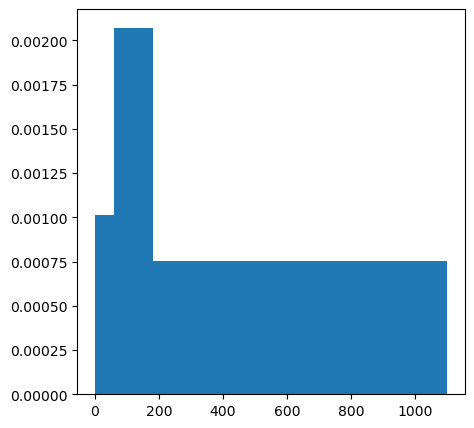

In [55]:
# hardness distribution
# As per  this website water is classified into 4 type (Soft,Moderately hard,Hard,Very hard) - https://waternitylab.com/water-hardness-scale/

plt.figure(figsize=(5,5))
plt.hist(water['hardness'],bins=[0,60,120,180,max(water['hardness'])],density=True)
plt.show()


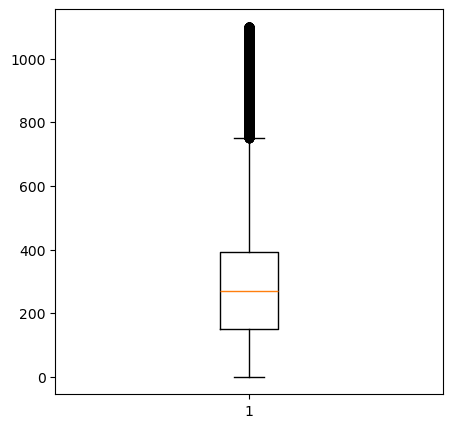

In [53]:
plt.figure(figsize=(5,5))
plt.boxplot(x=water['hardness'],meanline=True)
plt.show()

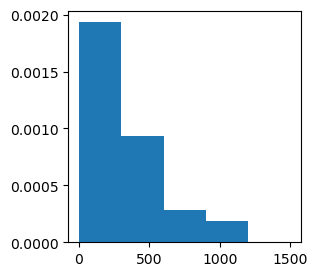

In [73]:
## TDS of water - https://www.safewater.org/fact-sheets-1/2017/1/23/tds-and-ph


plt.figure(figsize=(3,3))
plt.hist(water['tds'],bins=[0,300,600,900,1200,1500],density=True,)
plt.show()

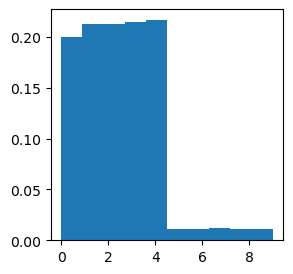

In [79]:
# Distribution of amount of chlorine

plt.figure(figsize=(3,3))
plt.hist(water['chlorine'],bins=10,density=True)
plt.show()

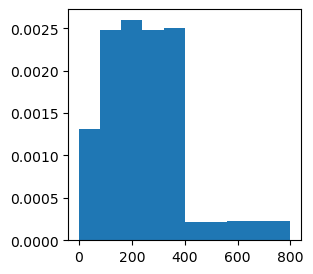

In [ ]:
# Sulfate

plt.figure(figsize=(3,3))
plt.hist(water['sulfate'],density=True)
plt.show()


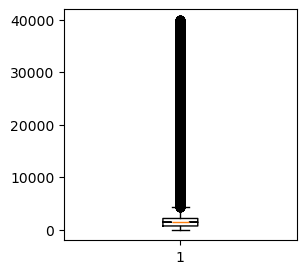

In [90]:
# conductivity

plt.figure(figsize=(3,3))
plt.boxplot(water['conductivity'],notch=True,meanline=True)
plt.show()

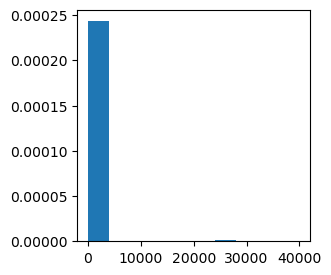

In [91]:
plt.figure(figsize=(3,3))
plt.hist(water['conductivity'],density=True)
plt.show()

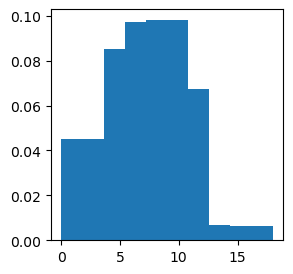

In [92]:
# organic_carbon

plt.figure(figsize=(3,3))
plt.hist(water['organic_carbon'],density=True)
plt.show()

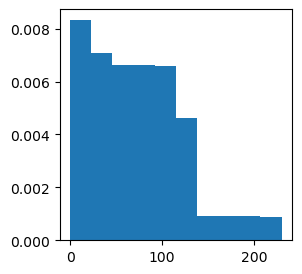

In [93]:
# trihalomethanes

plt.figure(figsize=(3,3))
plt.hist(water['trihalomethanes'],density=True)
plt.show()

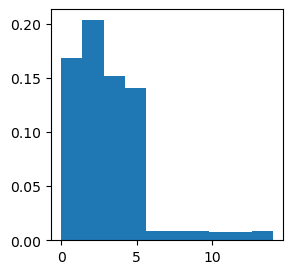

In [94]:
# turbidity

plt.figure(figsize=(3,3))
plt.hist(water['turbidity'],density=True)
plt.show()

##### 5. Correlation Analysis

In [98]:
water.columns

Index(['ph', 'hardness', 'tds', 'chlorine', 'sulfate', 'conductivity',
       'organic_carbon', 'trihalomethanes', 'turbidity', 'potability'],
      dtype='object')

In [95]:
water.corr()

,ph,hardness,tds,chlorine,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
ph,1.000000,-0.000865,0.005087,-0.000152,-0.001192,0.002050,-0.003460,0.004838,-0.000586,-0.002400
hardness,-0.000865,1.000000,0.002814,0.003463,0.001985,0.000608,-0.001051,0.000348,-0.000976,-0.107681
tds,0.005087,0.002814,1.000000,-0.002457,0.001801,-0.012823,-0.002614,-0.000343,-0.000848,-0.144023
chlorine,-0.000152,0.003463,-0.002457,1.000000,0.005048,0.000919,-0.002272,-0.003355,-0.000217,-0.086605
sulfate,-0.001192,0.001985,0.001801,0.005048,1.000000,-0.003930,0.006565,0.005740,-0.003162,-0.104360
conductivity,0.002050,0.000608,-0.012823,0.000919,-0.003930,1.000000,-0.006322,0.003860,-0.001760,-0.076786
organic_carbon,-0.003460,-0.001051,-0.002614,-0.002272,0.006565,-0.006322,1.000000,-0.007654,0.001106,-0.109109
trihalomethanes,0.004838,0.000348,-0.000343,-0.003355,0.005740,0.003860,-0.007654,1.000000,-0.007724,-0.142949
turbidity,-0.000586,-0.000976,-0.000848,-0.000217,-0.003162,-0.001760,0.001106,-0.007724,1.000000,-0.086242
potability,-0.002400,-0.107681,-0.144023,-0.086605,-0.104360,-0.076786,-0.109109,-0.142949,-0.086242,1.000000


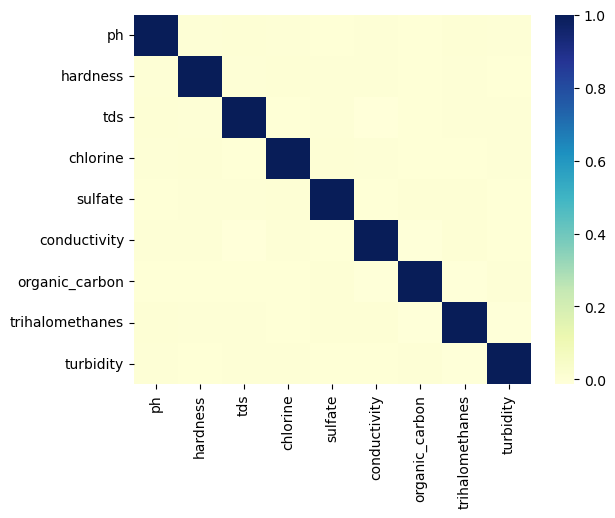

In [108]:
sns.heatmap(water[['ph', 'hardness', 'tds', 'chlorine', 'sulfate', 'conductivity',
       'organic_carbon', 'trihalomethanes', 'turbidity']].corr(),cmap='YlGnBu')
plt.show()

## Conclusion - Negligible/No correlation


##### 6. Feature Relationship

In [112]:
water.columns

Index(['ph', 'hardness', 'tds', 'chlorine', 'sulfate', 'conductivity',
       'organic_carbon', 'trihalomethanes', 'turbidity', 'potability'],
      dtype='object')

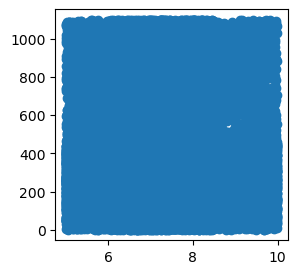

In [ ]:
## ph v/s hardness

plt.figure(figsize=(3,3))
plt.scatter(water['ph'],water['hardness'])
plt.show()

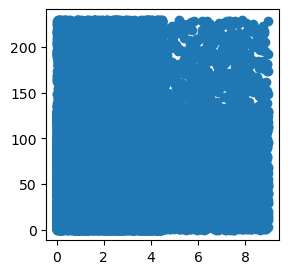

In [111]:
## chlorine vs trihalomethanes

plt.figure(figsize=(3,3))
plt.scatter(water['chlorine'],water['trihalomethanes'])
plt.show()

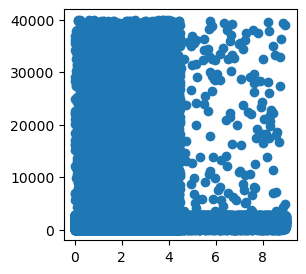

In [113]:
## chlorine vs conductivity

plt.figure(figsize=(3,3))
plt.scatter(water['chlorine'],water['conductivity'])
plt.show()

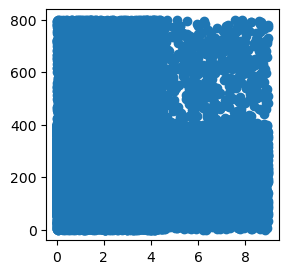

In [114]:
## chlorine vs sulfate

plt.figure(figsize=(3,3))
plt.scatter(water['chlorine'],water['sulfate'])
plt.show()

### Supervised Machine Learning Models

In [115]:
from sklearn.model_selection import train_test_split

In [141]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [119]:
from sklearn.preprocessing import StandardScaler

In [120]:
scaler=StandardScaler()

##### 1. Linear Regression Model

In [116]:
from sklearn.linear_model import LinearRegression

In [127]:
water_scaled=scaler.transform(water[['ph', 'hardness', 'tds', 'chlorine', 'sulfate', 'conductivity',
       'organic_carbon', 'trihalomethanes', 'turbidity']])

In [129]:
water_scaled=pd.DataFrame(water_scaled,columns=['ph', 'hardness', 'tds', 'chlorine', 'sulfate', 'conductivity',
       'organic_carbon', 'trihalomethanes', 'turbidity'])

In [131]:
water_scaled['potability']=water['potability']

In [133]:
X=water_scaled[['ph', 'hardness', 'tds', 'chlorine', 'sulfate', 'conductivity',
       'organic_carbon', 'trihalomethanes', 'turbidity']]
y=water_scaled['potability']

In [134]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

In [135]:
LinearModel=LinearRegression()

In [136]:
LinearModel.fit(X_train,y_train)

LinearRegression()

In [137]:
y_pred=LinearModel.predict(X_test)

In [139]:
y_pred=pd.Series(y_pred)

In [143]:
y_pred=y_pred.apply(lambda x:0 if x<0.5 else 1)

In [160]:
print("Linear Regression Model\n")
print("Confusion Matrix - \n",confusion_matrix(y_test,y_pred))
print("\n Accuracy = {}%".format(accuracy_score(y_test,y_pred)*100))


Linear Regression Model

Confusion Matrix - 
 [[27714     0]
 [ 2286     0]]

 Accuracy = 92.38%


In [153]:
print("Weights=\n",pd.Series(LinearModel.coef_,index=['ph', 'hardness', 'tds', 'chlorine', 'sulfate', 'conductivity',
       'organic_carbon', 'trihalomethanes', 'turbidity']))

Weights=
 ph                -0.000080
hardness          -0.028617
tds               -0.038572
chlorine          -0.022838
sulfate           -0.027085
conductivity      -0.021204
organic_carbon    -0.030009
trihalomethanes   -0.037960
turbidity         -0.023348
dtype: float64


##### 2. Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [162]:
LogisticModel=LogisticRegression()

In [163]:
LogisticModel.fit(X_train,y_train)

LogisticRegression()

In [164]:
y_pred=LogisticModel.predict(X_test)

In [166]:
y_pred=pd.Series(y_pred)

In [170]:
print("Logistic Regression Model\n")
print("Confusion Matrix - \n",confusion_matrix(y_test,y_pred))
print("\n Accuracy = {}%".format(accuracy_score(y_test,y_pred)*100))

Logistic Regression Model

Confusion Matrix - 
 [[27369   345]
 [ 1994   292]]

 Accuracy = 92.20333333333333%


##### 3. Decision Tree Model

In [176]:
from sklearn.tree import DecisionTreeClassifier

In [184]:
from sklearn.tree import plot_tree

In [174]:
Predictor_Vars=water[['ph', 'hardness', 'tds', 'chlorine', 'sulfate', 'conductivity',
       'organic_carbon', 'trihalomethanes', 'turbidity']]
Response_Var=water['potability']

In [180]:
Predictor_Vars_train,Predictor_Vars_test,Response_Var_train,Response_Var_test=train_test_split(Predictor_Vars,Response_Var,train_size=0.7)

In [177]:
DecisionTreeModel=DecisionTreeClassifier()

In [181]:
DecisionTreeModel.fit(Predictor_Vars_train,Response_Var_train)

DecisionTreeClassifier()

In [182]:
Response_Var_pred=DecisionTreeModel.predict(Predictor_Vars_test)

In [183]:
print("Decision Tree Classifier Model\n")
print("Confusion Matrix - \n",confusion_matrix(Response_Var_test,Response_Var_pred))
print("\n Accuracy = {}%".format(accuracy_score(Response_Var_test,Response_Var_pred)*100))

Decision Tree Classifier Model

Confusion Matrix - 
 [[27696    51]
 [   60  2193]]

 Accuracy = 99.63%


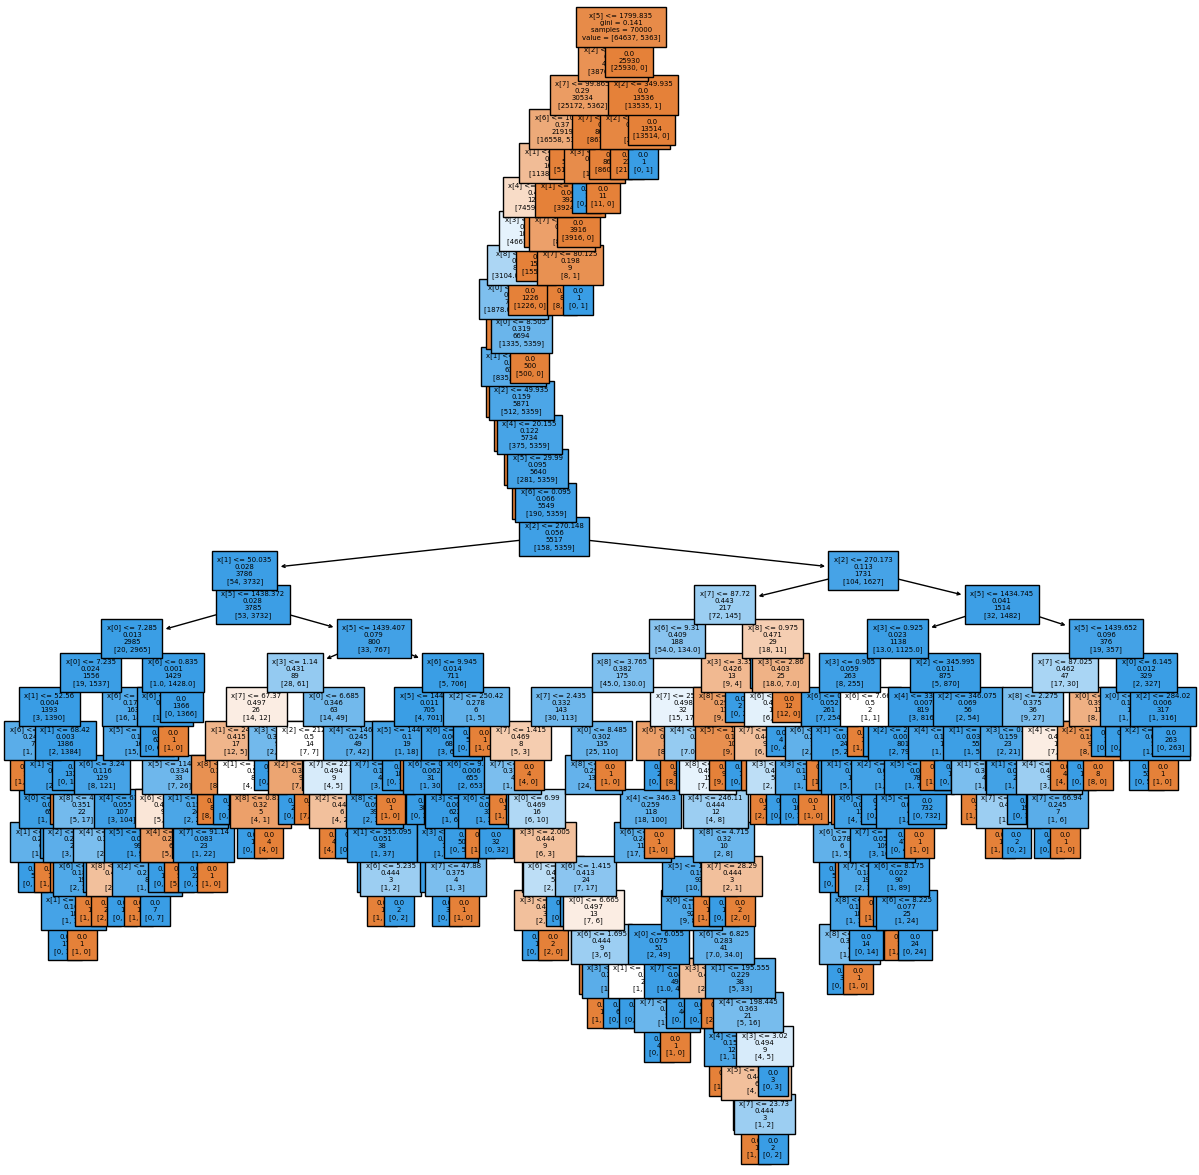

In [190]:
plt.figure(figsize=(15, 15))
plot_tree(DecisionTreeModel,label="root",impurity=True,filled=True,fontsize=5)
plt.show()

##### 4. Random Forest Model

In [191]:
from sklearn.ensemble import RandomForestClassifier

In [192]:
RandomForestModel=RandomForestClassifier()

In [193]:
RandomForestModel.fit(Predictor_Vars_train,Response_Var_train)

RandomForestClassifier()

In [194]:
Response_Var_pred= RandomForestModel.predict(Predictor_Vars_test)

In [195]:
print("Random Forest Classifier Model\n")
print("Confusion Matrix - \n",confusion_matrix(Response_Var_test,Response_Var_pred))
print("\n Accuracy = {}%".format(accuracy_score(Response_Var_test,Response_Var_pred)*100))

Random Forest Classifier Model

Confusion Matrix - 
 [[27676    71]
 [    8  2245]]

 Accuracy = 99.73666666666666%


##### 5. Ada Boost Classifier Model

In [196]:
from sklearn.ensemble import AdaBoostClassifier

In [197]:
AdaBoostModel=AdaBoostClassifier()

In [198]:
AdaBoostModel.fit(Predictor_Vars_train,Response_Var_train)

AdaBoostClassifier()

In [199]:
Response_Var_pred= AdaBoostModel.predict(Predictor_Vars_test)

In [200]:
print("AdaBoost Classifier Model\n")
print("Confusion Matrix - \n",confusion_matrix(Response_Var_test,Response_Var_pred))
print("\n Accuracy = {}%".format(accuracy_score(Response_Var_test,Response_Var_pred)*100))

AdaBoost Classifier Model

Confusion Matrix - 
 [[27683    64]
 [   15  2238]]

 Accuracy = 99.73666666666666%


##### 6. Gradient Boost Classifier Model

In [201]:
from sklearn.ensemble import GradientBoostingClassifier

In [202]:
GradientBoostModel=GradientBoostingClassifier()

In [203]:
GradientBoostModel.fit(Predictor_Vars_train,Response_Var_train)

GradientBoostingClassifier()

In [204]:
Response_Var_pred= GradientBoostModel.predict(Predictor_Vars_test)

In [205]:
print("Gradient Boost Classifier Model\n")
print("Confusion Matrix - \n",confusion_matrix(Response_Var_test,Response_Var_pred))
print("\n Accuracy = {}%".format(accuracy_score(Response_Var_test,Response_Var_pred)*100))

Gradient Boost Classifier Model

Confusion Matrix - 
 [[27664    83]
 [    5  2248]]

 Accuracy = 99.70666666666666%


### Best Model and Parameter selection

In [206]:
from sklearn.model_selection import RandomizedSearchCV

##### 1. Listing all the parameters that we want to check

In [207]:
dt_params={
    "criterion":["gini", "entropy", "log_loss"],
    "splitter":["best","random"],
    "max_depth":[5,10,15,20,50,100],
    
}

In [208]:
rf_params={
    "criterion":["gini","entropy","log_loss"],
    "max_depth":[5,10,15,20,50,100,None],
    "max_features":["sqrt", "log2", None]
}

In [209]:
gb_params={
    "loss":["log_loss","exponential"],
    "learning_rate":[0.1,0.5,1,2,10,100],
    "n_estimators":[10,20,50,100],
    "criterion":['friedman_mse','squared_error']
}

In [210]:
ab_params={
    "learning_rate":[0.1,0.5,1,2,10,100],
    "n_estimators":[10,20,50,100]    
}

##### 2. Passing parameters to RandomizedCV function

In [211]:
models=["DecisionTreeClassifier","RandomForestClassifier","GradientBoostingClassifier","AdaBoostClassifier"]
model_initializations=[DecisionTreeModel,RandomForestModel,GradientBoostModel,AdaBoostModel]
model_params=[dt_params,rf_params,gb_params,ab_params]

In [212]:
for i in range(len(model_initializations)):
    random_search=RandomizedSearchCV(
        estimator=model_initializations[i],
        param_distributions=model_params[i]

    )
    random_search.fit(X_train,y_train)
    print(models[i])
    print("Best Parameters = ",random_search.best_params_)
    print("Best Estimator = ",random_search.best_estimator_)
    print("Best Score = ",random_search.best_score_)
    print('\n\n---------------------------\n\n')

DecisionTreeClassifier
Best Parameters =  {'splitter': 'best', 'max_depth': 15, 'criterion': 'entropy'}
Best Estimator =  DecisionTreeClassifier(criterion='entropy', max_depth=15)
Best Score =  0.9975571428571429


---------------------------


RandomForestClassifier
Best Parameters =  {'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'log_loss'}
Best Estimator =  RandomForestClassifier(criterion='log_loss', max_depth=15)
Best Score =  0.9975428571428571


---------------------------


GradientBoostingClassifier
Best Parameters =  {'n_estimators': 50, 'loss': 'exponential', 'learning_rate': 0.5, 'criterion': 'friedman_mse'}
Best Estimator =  GradientBoostingClassifier(learning_rate=0.5, loss='exponential',
                           n_estimators=50)
Best Score =  0.997457142857143


---------------------------


AdaBoostClassifier
Best Parameters =  {'n_estimators': 50, 'learning_rate': 0.5}
Best Estimator =  AdaBoostClassifier(learning_rate=0.5)
Best Score =  0.9975571428571428

